In [1]:
# load things
%matplotlib inline

from pyCDFTOOLS.cdfmocsig import *

import matplotlib.pyplot as plt
from matplotlib_colorbar import *

import numpy as np
import glob
import netCDF4, copy

In [2]:
# load data and do relevant processing on the native grid

data_dir = "/home/julian/data/NEMO_data/eORCA1-LIM3/default/"

fileV = "eORCA1_1m_10010101_10101231_MOC_V_1010-1010.nc"
fileT = "eORCA1_1m_10010101_10101231_MOC_T_1010-1010.nc"

# generate bins from presets (available for 0, 1000, 2000m depth), or define it in a dictionary as
#    bins = {"pref"   : 2000,
#            "nbins"  : 158,
#            "sigmin" : 30.0,
#            "sigstp" : 0.05}

bins = sigma_bins(2000)


In [3]:
# for putting extra options in
#   -- kt       = number for using a specified time entry (python indexing)
#   -- kz       = number for using a specified vertical level/layer (python indexing)
#   -- lprint   = True   for printing out variable names in netcdf file
#   -- lverb    = True   for printing out more information
#   -- lg_vvl   = True   for using s-coord (time-varying metric)
#   -- ldec     = True   decompose the MOC into some components
#   -- leiv     = True   for adding the eddy induced velocity component
#        eivv_var = string for EIV-v variable name
#   -- lisodep  = True   (not yet implemented) output zonal averaged isopycnal depth
#   -- lntr     = True   (not yet implemented) do binning with neutral density
kwargs =  {"kt"     : 0,
           "lprint" : False,
           "lg_vvl" : False,
           "ldec"   : False,
           "leiv"   : True,  "eivv_var" : "voce_eiv",
           "lisodep": True,
           "lntr"   : False,
           "lverb"  : True}

# generate a field
sigma, depi, latV, dmoc, opt_dic = cdfmocsig(data_dir, fileV, "voce", fileT, "toce", "soce", bins, **kwargs)

using eddy induced velocity too
min density for binning = 30.025
max density for binning = 37.875
slow k loop, progress = 0.00 %...0.22 %...0.43 %...0.65 %...0.87 %...

/home/julian/Documents/NEMO/ORCA1/pyCDFTOOLS/cdfmocsig.py:201: RuntimeWarning: invalid value encountered in true_divide
  depi = where(wdep != 0, depi / wdep, 0)


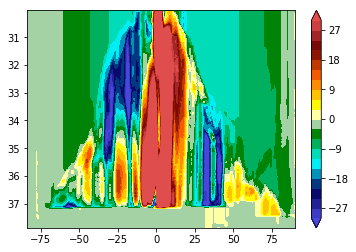

In [20]:
plt.contourf(latV, sigma, dmoc[0, :, :], np.arange(-30, 31, 3), cmap = rainbow_desaturated_white, extend = "both")
plt.gca().invert_yaxis()
plt.colorbar()

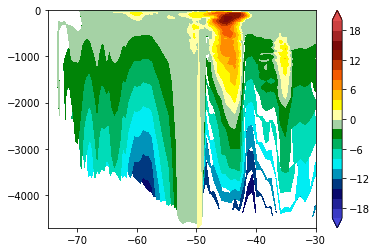

In [21]:
latV_mesh = np.zeros(depi[0, :, :].shape)
for j in range(latV_mesh.shape[0]):
    latV_mesh[j, :] = latV
plt.contourf(latV_mesh, depi[0, :, :], dmoc[0, :, :], np.arange(-20, 21, 2), 
             cmap = rainbow_desaturated_white, extend = "both")
plt.xlim(-75, -30)
plt.colorbar()